In [2]:
!pip install pyplr
!pip install neurokit2
import sys
sys.path.append("../Pupillengröße/Skripte/")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging as log
from preprocessfunction2 import PLR2d
from preprocessfunction3 import PLR3d
import checkdata
import importlib
from IPython.display import display
def display_all(df):
    from IPython.display import HTML, display
    IPython.display(IPython.HTML(df.to_html()))


You should consider upgrading via the '/Users/Katharina/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Katharina/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.


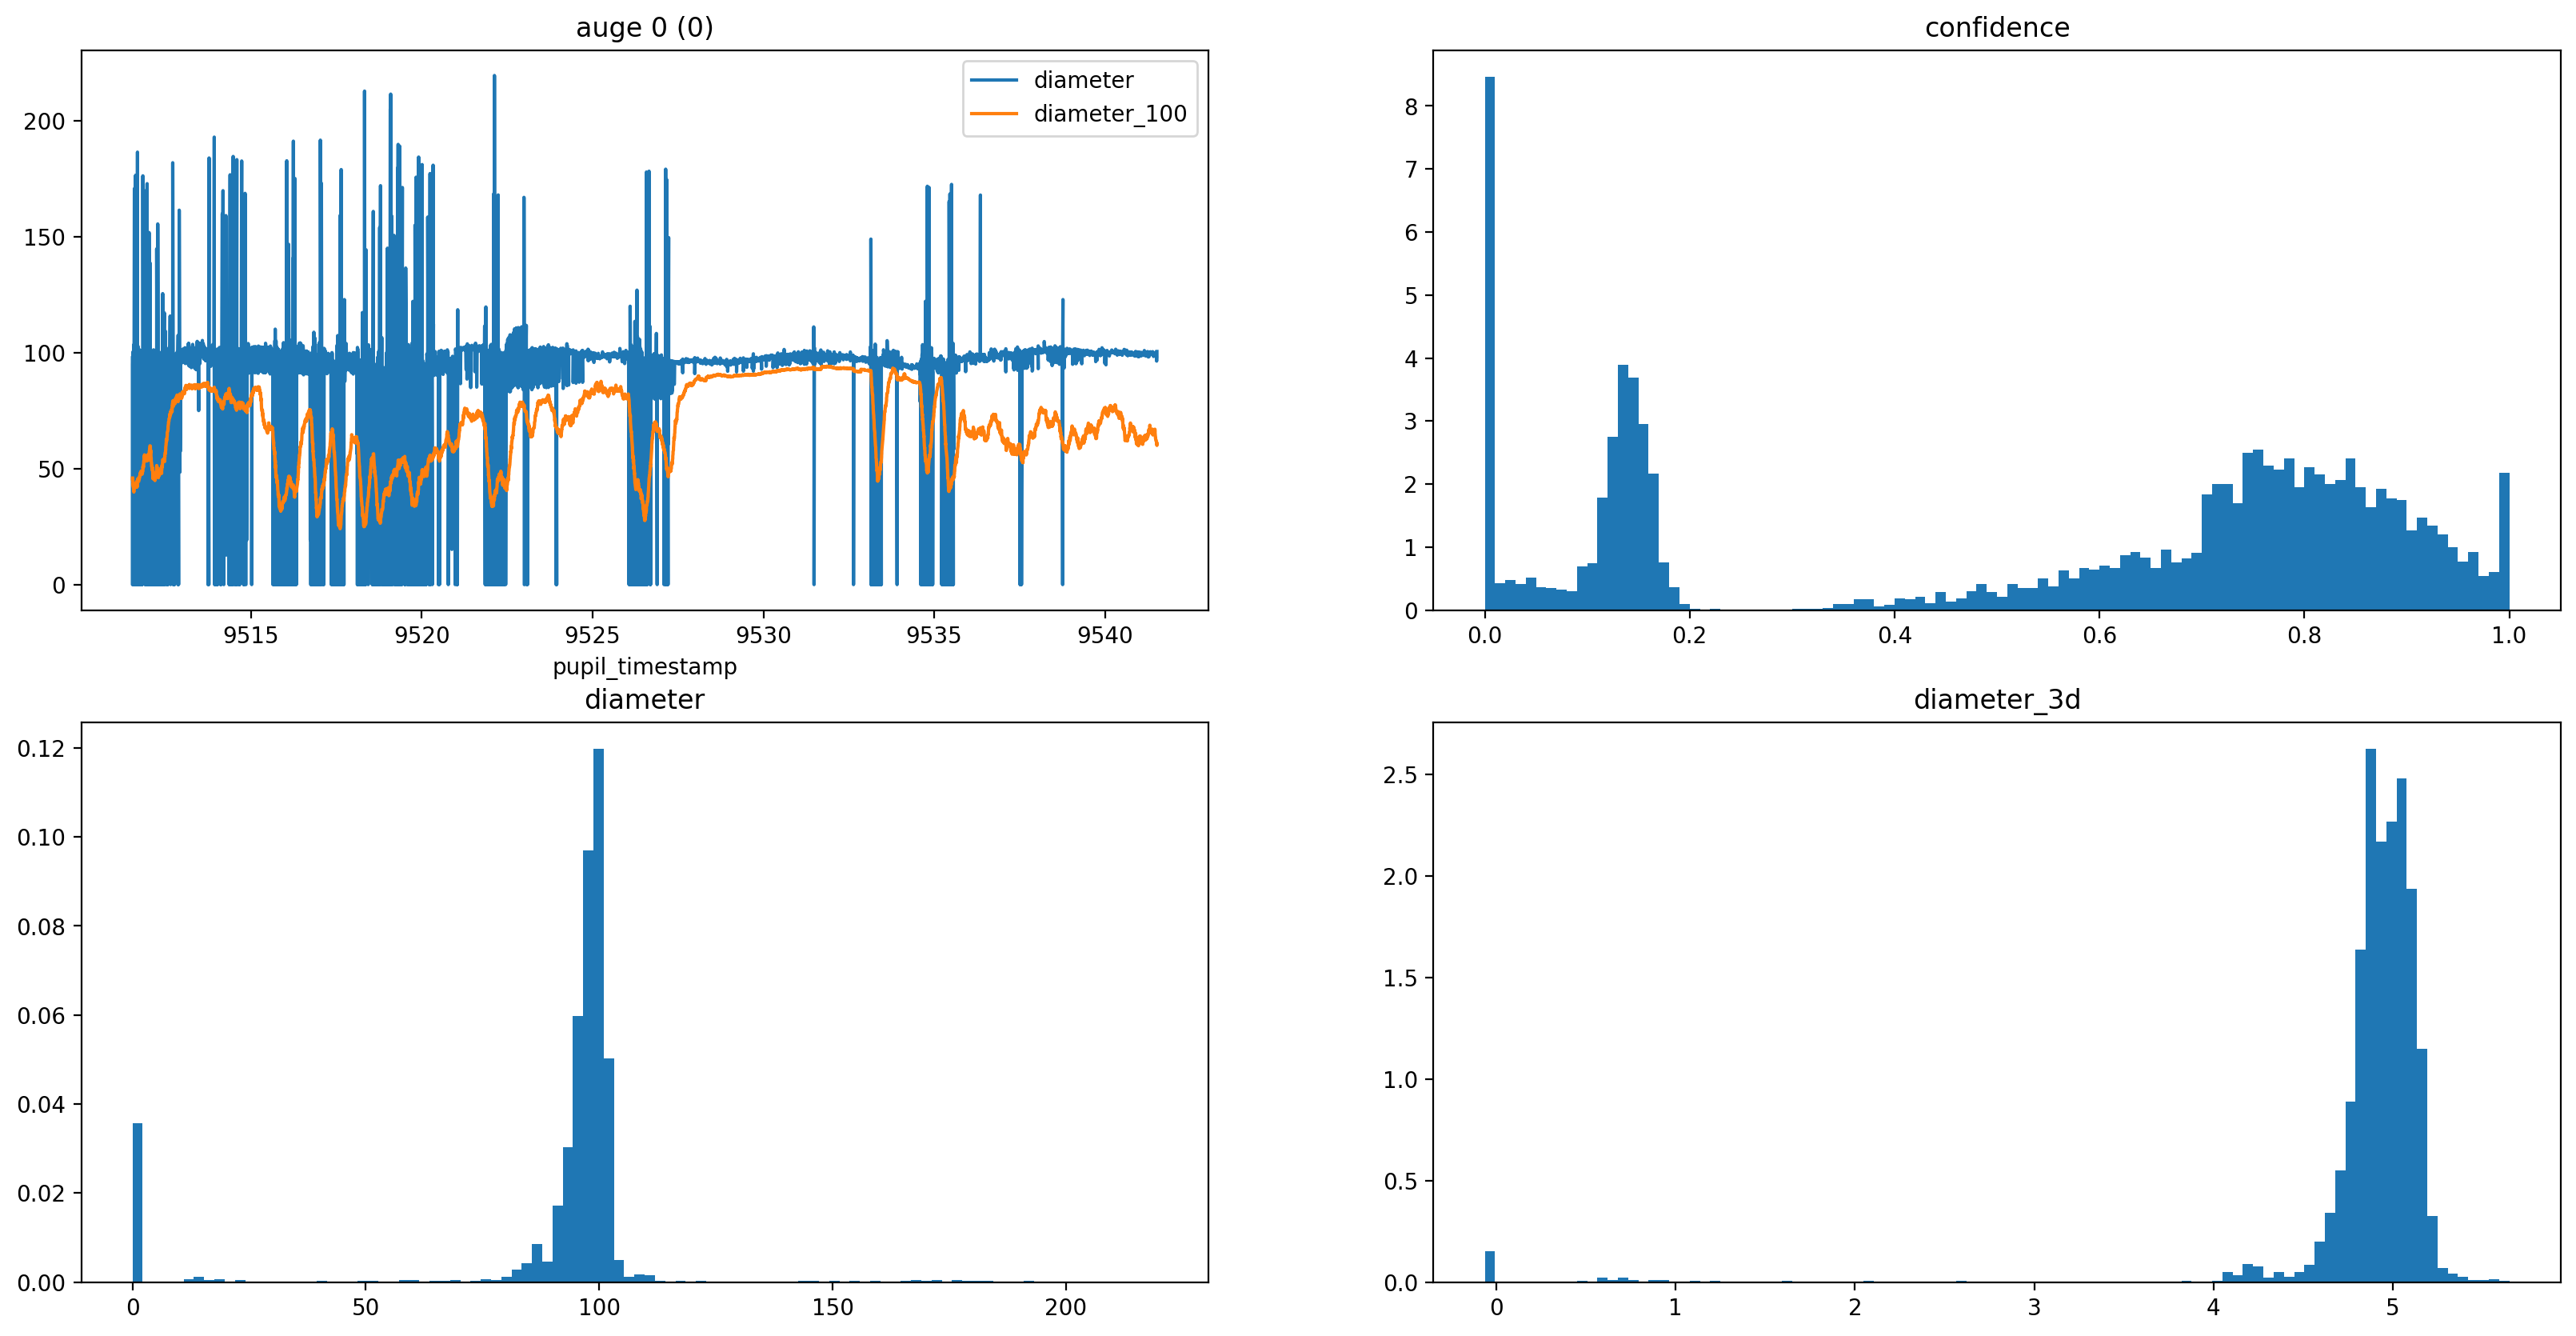

,pupil_timestamp,eye_id,confidence,diameter,diameter_3d,diameter_100,rowid,timeslot
6686,9511.527066,0,0.146799,97.781408,4.974271,45.926721,0,0
6687,9511.527066,0,0.000000,0.000000,NaN,45.055618,1,0
6690,9511.536714,0,0.000000,0.000000,NaN,45.349471,2,0
6691,9511.536714,0,0.163185,94.919530,4.840710,45.419621,3,0
6694,9511.544020,0,0.000000,100.388168,NaN,43.006937,4,0
...,...,...,...,...,...,...,...,...
20679,9541.506436,0,0.751662,98.420733,4.996190,61.675516,6977,6
20682,9541.514508,0,0.125558,96.360084,4.909053,60.835710,6978,6
20683,9541.514508,0,0.676440,96.998528,NaN,60.811853,6979,6
20686,9541.522482,0,0.694197,98.177689,NaN,60.009205,6980,6


In [6]:
# wenn ich checkpadata.py ändere, muß das Modul neu importiert werden. Das macht reload()
importlib.reload(checkdata)
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200 
subject_id="PJ06_1_Ruhe"
data_dir="/Users/Katharina/Desktop/Beispieldaten"
#data_dir="../data/groesse/3.4Stimulation/"
config=checkdata.DataConfig(window_duration=30)
eye0=checkdata.prepare(data_dir,subject_id,0,config)
eye1=checkdata.prepare(data_dir,subject_id,1,config)
checkdata.plot(eye0[0],"auge 0 (0)")
display(eye0[0])


### Use datamatrix from pydatamatrix.eu to fill in blinking gaps

In [7]:
!pip install fastnumbers
!pip install datamatrix
import datamatrix
import datamatrix.series
import datamatrix.operations

You should consider upgrading via the '/Users/Katharina/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Katharina/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.


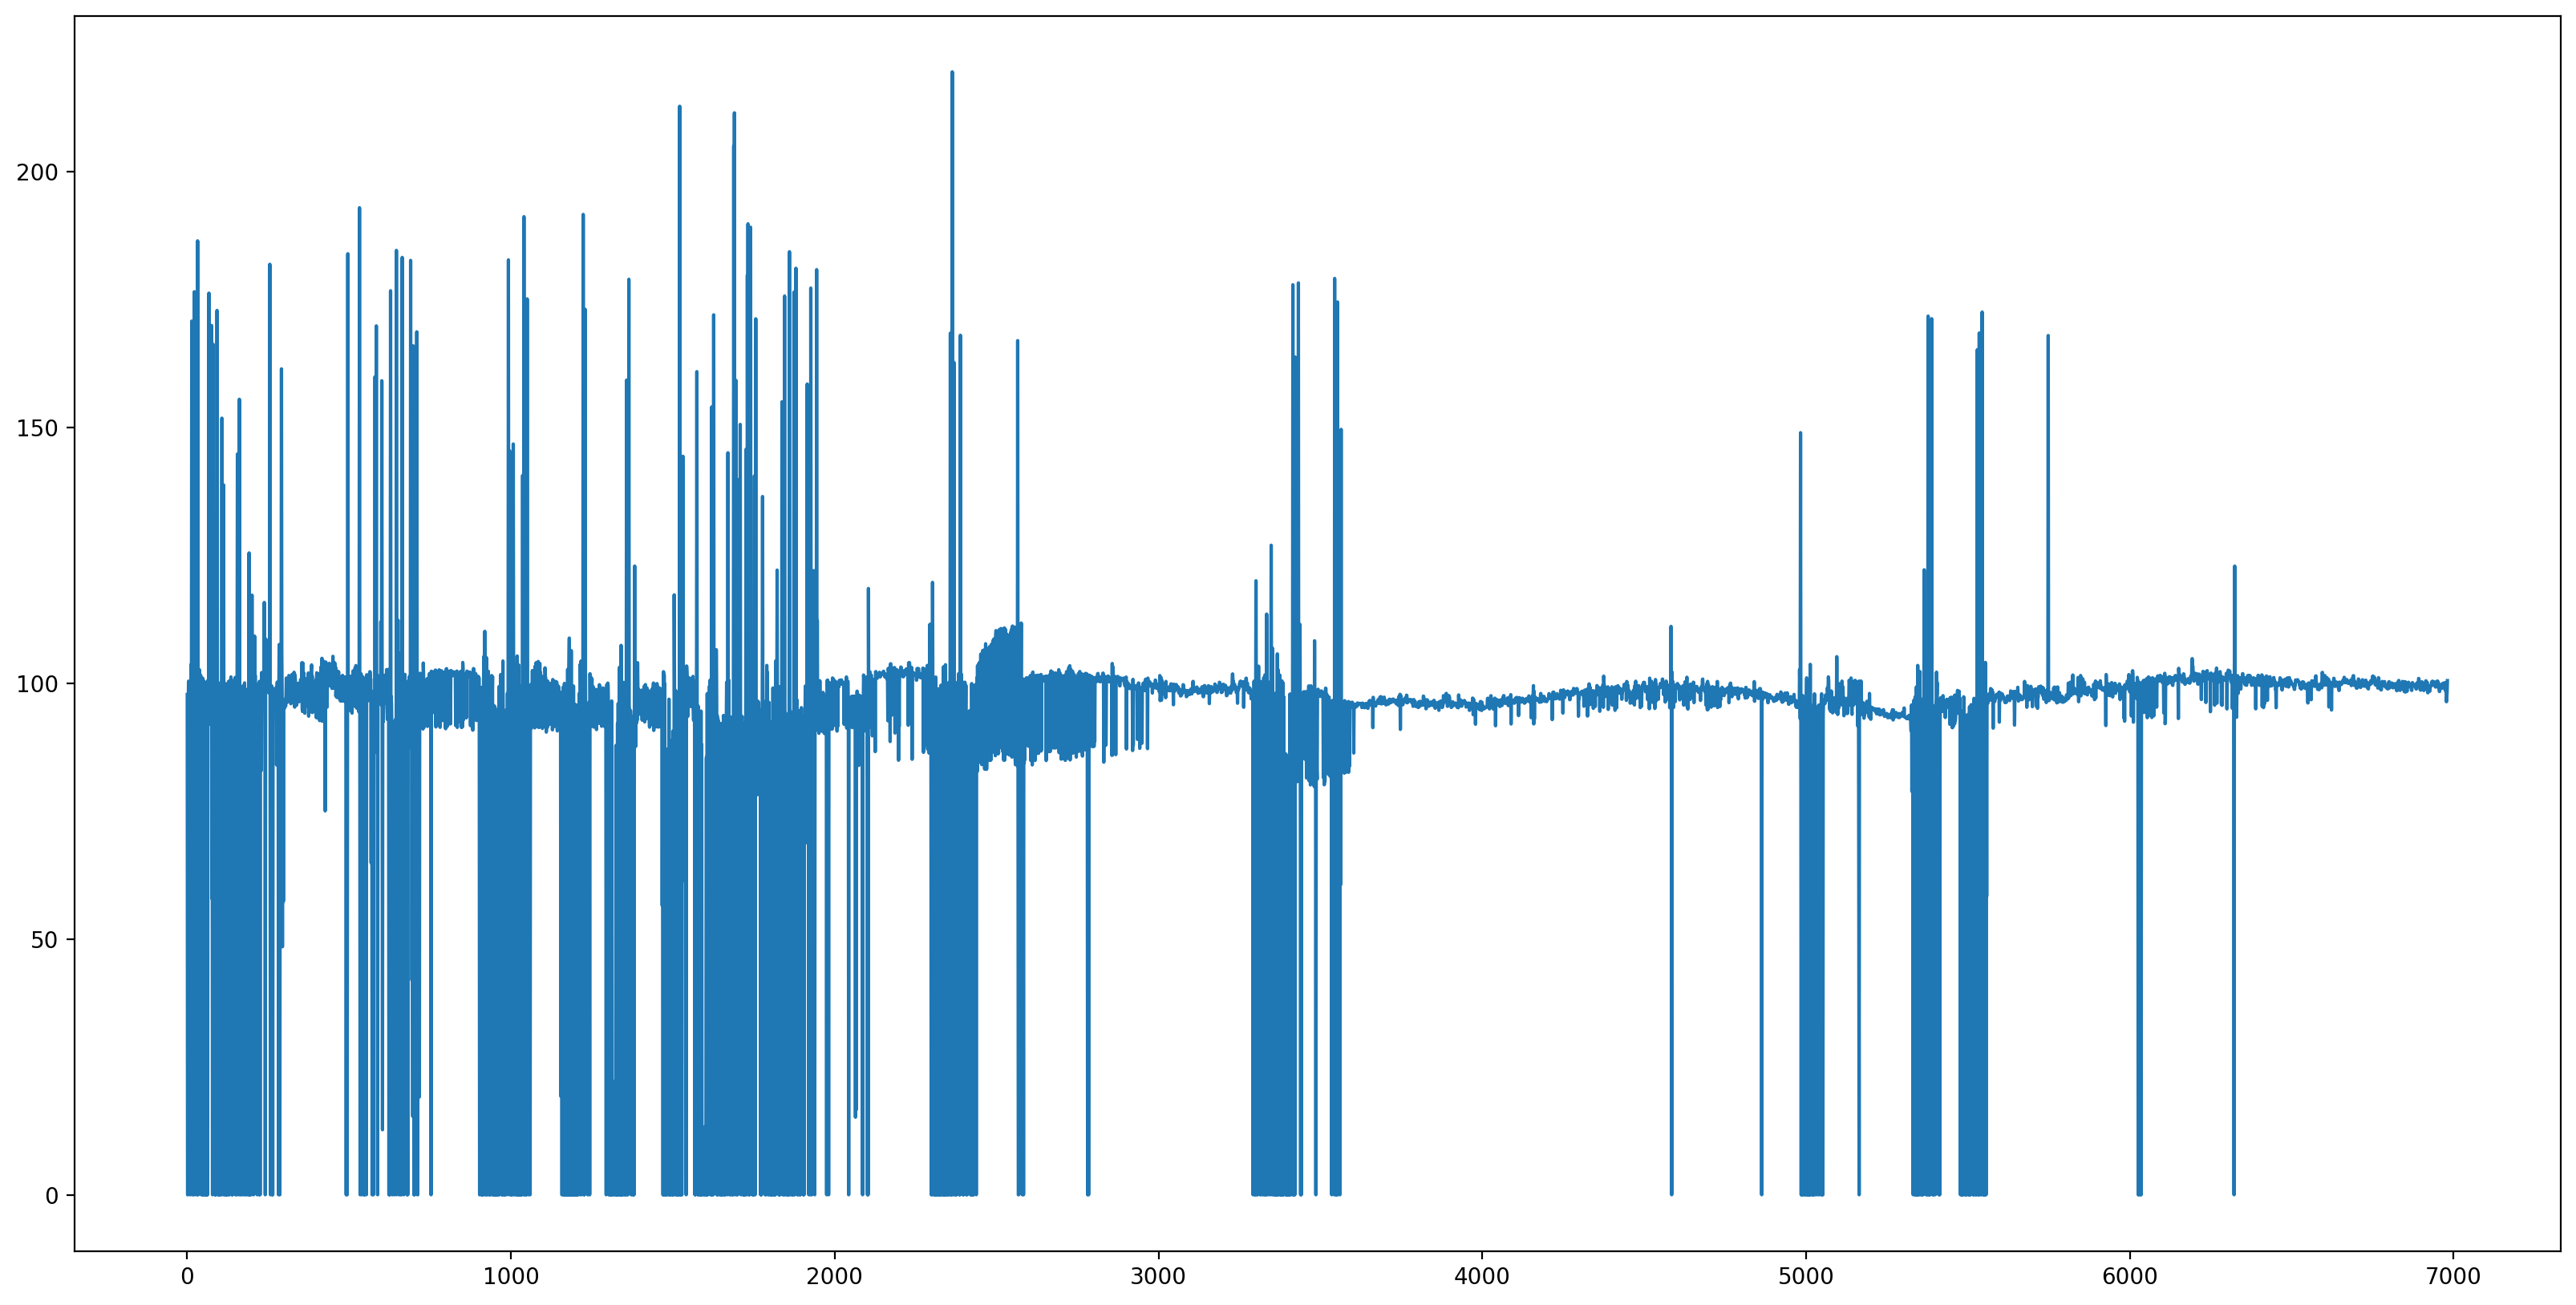

In [8]:
dm_eye0_diameter=datamatrix.convert.from_pandas(eye0[0])['diameter']
plt.plot(dm_eye0_diameter)


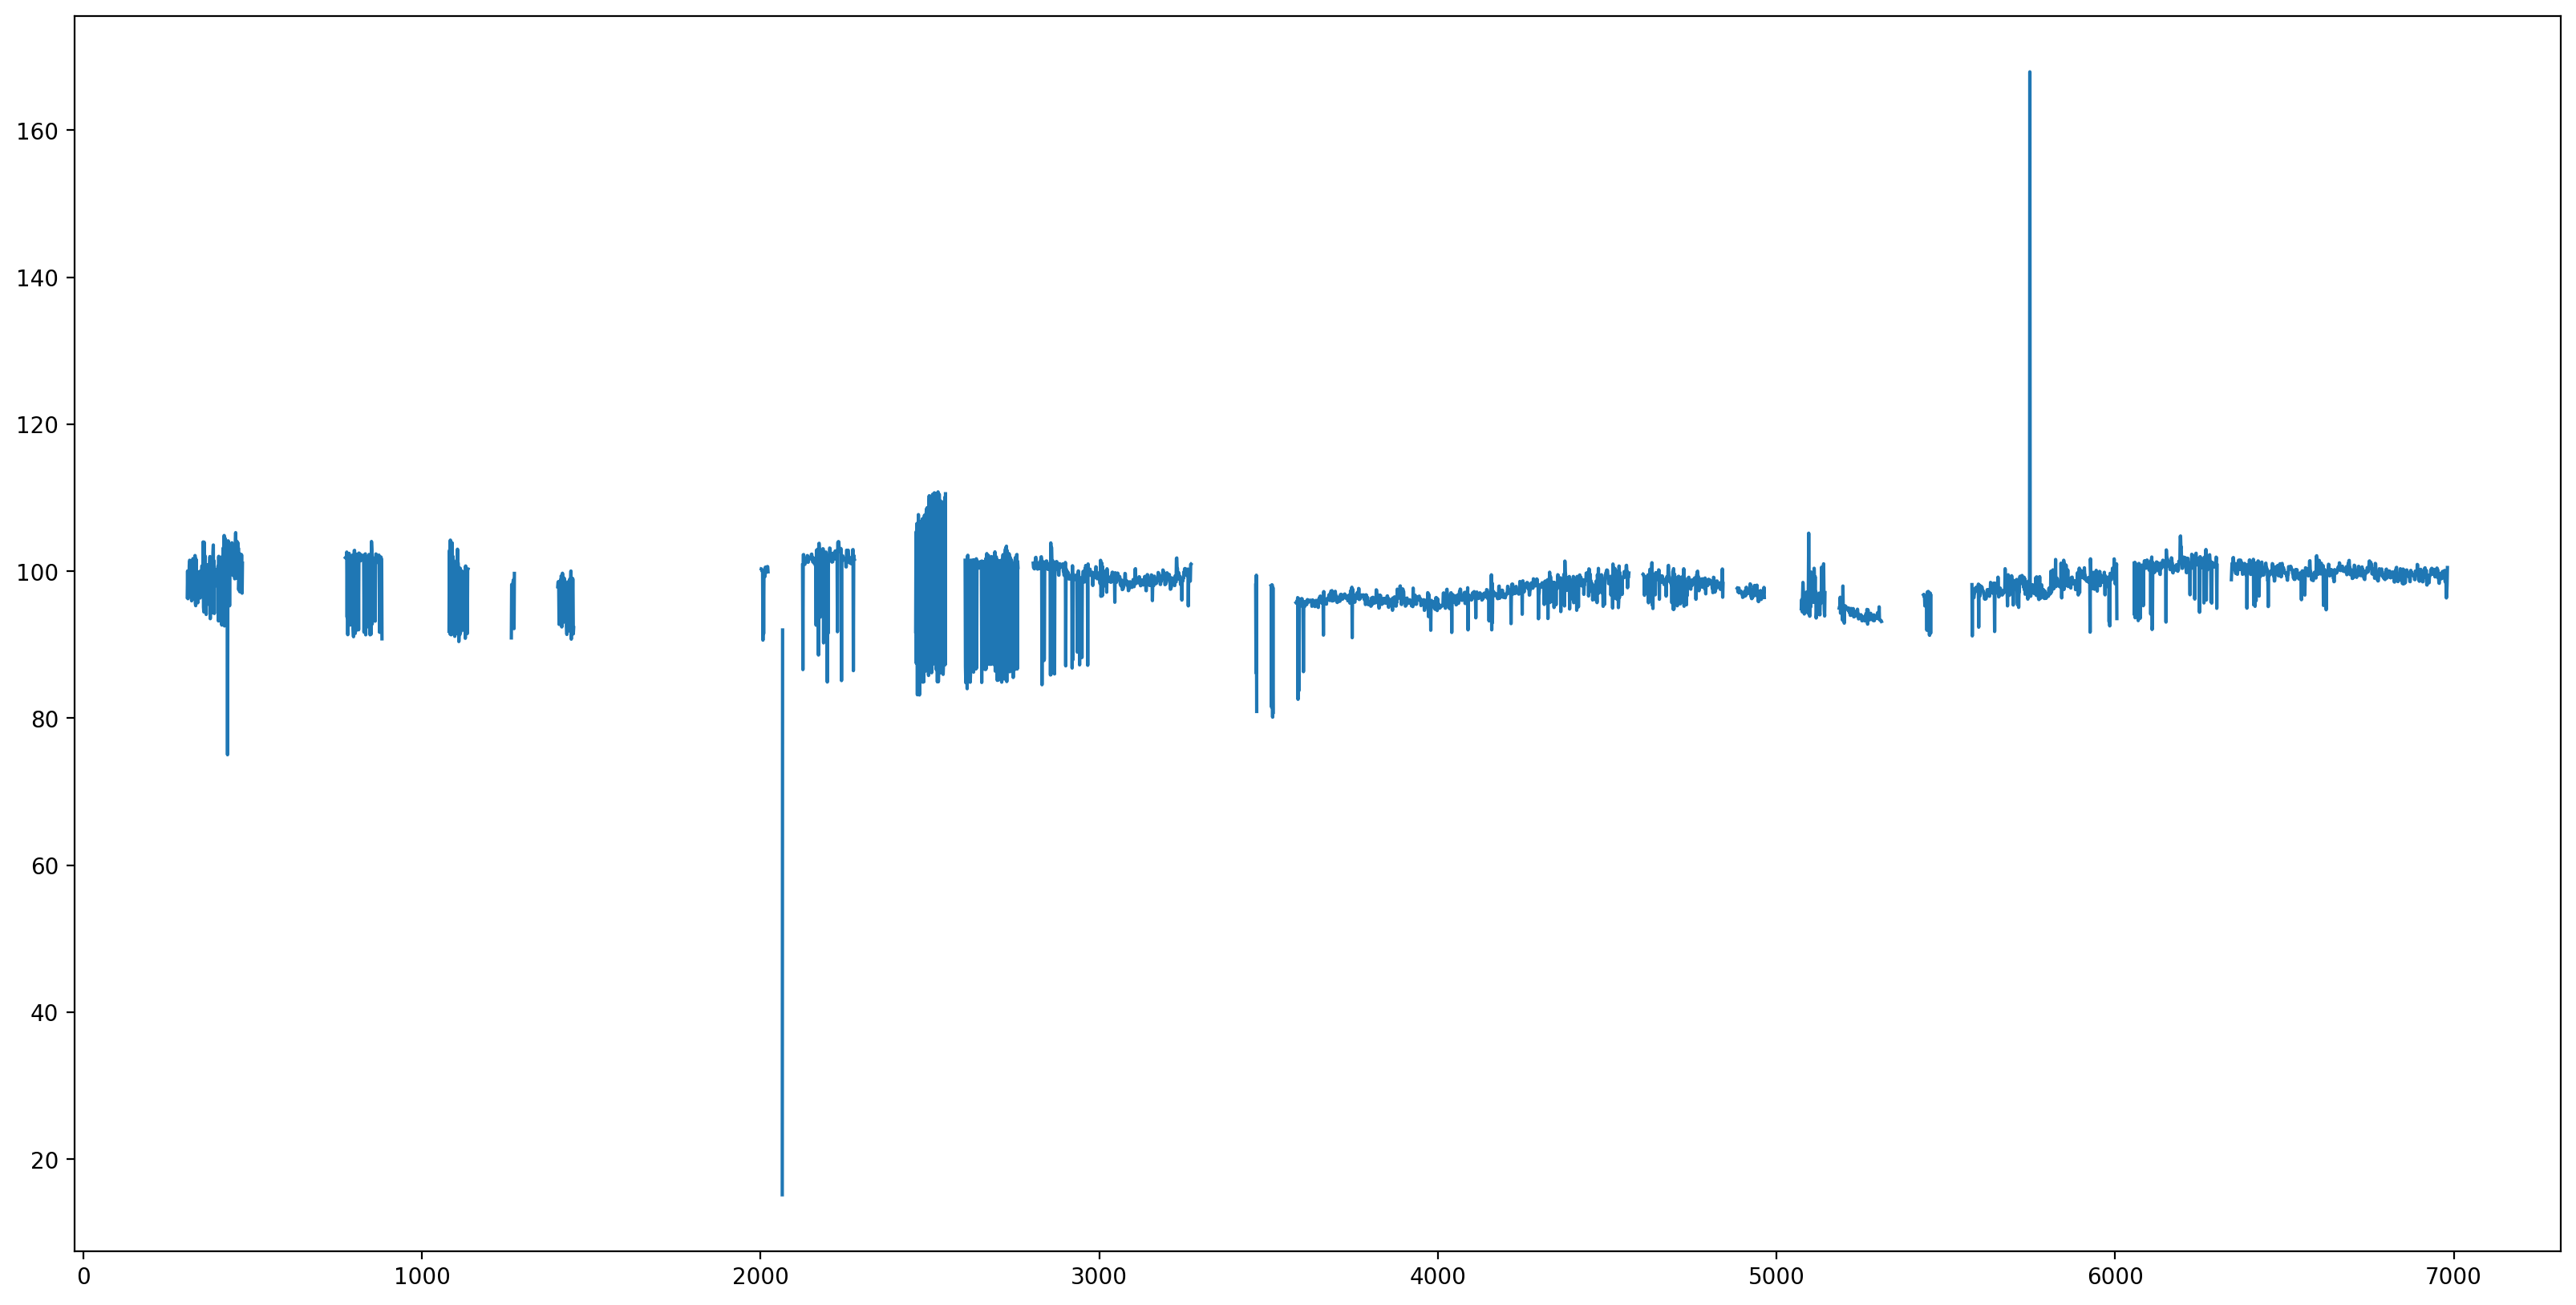

In [13]:
dm_eye0_diameter_fixed=datamatrix.series.blinkreconstruct(dm_eye0_diameter, , mode='advanced')
plt.plot(dm_eye0_diameter_fixed)
        eye['diameter_rec']=checkdata.blinkreconstruct(eye['diameter'], 
                                                       vt_start=10/800,vt_end=5/800, mode='advanced')


In [19]:
import preprocessing

In [10]:
import tkinter